Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 5th Semester                                           
Batch: I-3            
                                                                       Date: 11/10/2022       
Subject: DL
###Assignment-9

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
model = VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from keras import models, layers
model.layers

In [5]:
#from keras.preprocessing import image,img_to_array
import keras
import tensorflow as tf
#from tensorflow.keras.utils.load_img 
img_path = '/content/doggo.png'
img_path2 = '/content/train.png'
img = keras.utils.load_img(img_path,target_size=(224,224))
img2 = keras.utils.load_img(img_path2,target_size=(224,224))

In [6]:
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [7]:
img_class=model.predict(x)

1/1 [==============================] - 1s 1s/step


In [8]:
from keras.applications.imagenet_utils import decode_predictions
predict_class=decode_predictions(img_class)

35363/35363 [==============================] - 0s 0us/step


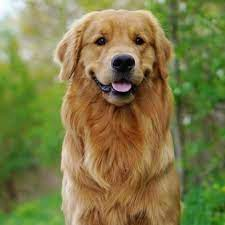

In [9]:
from google.colab.patches import cv2_imshow
import cv2

imaged = cv2.imread(img_path)

cv2_imshow(imaged)

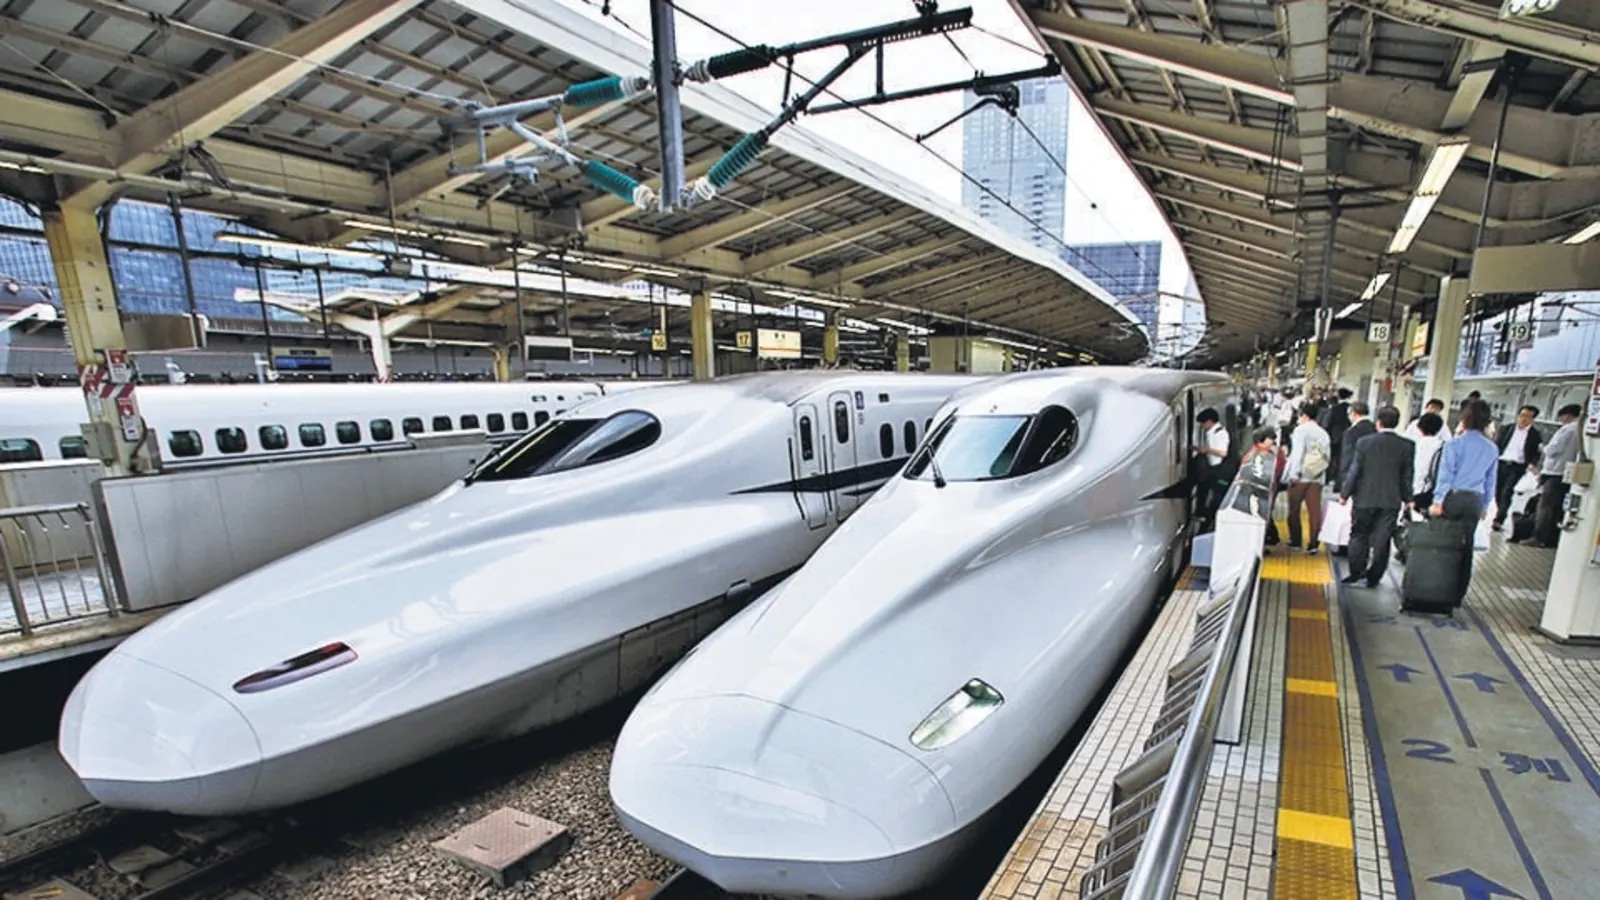

In [10]:
image2 = cv2.imread(img_path2)

cv2_imshow(image2)

In [11]:
predict_class

[[('n02099601', 'golden_retriever', 0.9261375),
  ('n02102480', 'Sussex_spaniel', 0.009056624),
  ('n02099267', 'flat-coated_retriever', 0.007781897),
  ('n04409515', 'tennis_ball', 0.0075593605),
  ('n02099712', 'Labrador_retriever', 0.007397881)]]

In [12]:
x2=img_to_array(img2)
x2=np.expand_dims(x2,axis=0)
x2=preprocess_input(x2)
img_class2=model.predict(x2)
predict_class2=decode_predictions(img_class2)

1/1 [==============================] - 1s 604ms/step


In [13]:
predict_class2

[[('n02917067', 'bullet_train', 0.9997043),
  ('n04483307', 'trimaran', 9.139387e-05),
  ('n04347754', 'submarine', 7.2378665e-05),
  ('n03272562', 'electric_locomotive', 6.1001458e-05),
  ('n02981792', 'catamaran', 1.597752e-05)]]

In [14]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import keras
vgg_model = keras.applications.vgg16.VGG16()
model2 = Sequential()

In [15]:
for layer in vgg_model.layers[:-1]: #  when we initialize we just dont add the  last layer
    model2.add(layer)    

# Freeze the layers 
for layer in model2.layers:
    layer.trainable = False

#flatten
#model2.add(Flatten())

#dense layer
model2.add(Dense(1024,activation='relu'))
# Add 'softmax' instead of earlier 'prediction' layer.
model2.add(Dense(2, activation='softmax'))

In [16]:
input_shape=[224,224,3]
model2.build(input_shape)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
from google.colab import drive
drive.mount('/content/drive')

testp1 = "/content/drive/MyDrive/test"
trainp2 = "/content/drive/MyDrive/train"
train_data_dir = testp1
validation_data_dir = trainp2
img_width, img_height = 224,224
train_samples = 300
validation_samples = 100
#pre proc train and test data
from keras.preprocessing.image import ImageDataGenerator

train_preprocess = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.25, horizontal_flip=True)
test_preprocess = ImageDataGenerator(1./255)
train_data = train_preprocess.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=16)
validation_data = test_preprocess.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=16)

Mounted at /content/drive
Found 100 images belonging to 2 classes.
Found 409 images belonging to 2 classes.


In [20]:
optimizer = tf.keras.optimizers.Adam()
model2.compile(optimizer = optimizer,loss='binary_crossentropy', metrics=['accuracy'])

model2.fit_generator(train_data,  validation_data=validation_data,epochs=5, steps_per_epoch=len(train_data),validation_steps=len(validation_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 4.5885 - accuracy: 0.4400

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


7/7 [==============================] - 314s 50s/step - loss: 4.5885 - accuracy: 0.4400 - val_loss: 0.7349 - val_accuracy: 0.7017
Epoch 2/5
7/7 [==============================] - 272s 44s/step - loss: 0.8101 - accuracy: 0.6100 - val_loss: 0.1785 - val_accuracy: 0.9707
Epoch 3/5
7/7 [==============================] - 270s 44s/step - loss: 0.4750 - accuracy: 0.7400 - val_loss: 0.1550 - val_accuracy: 0.9413
Epoch 4/5
7/7 [==============================] - 270s 44s/step - loss: 0.5031 - accuracy: 0.7700 - val_loss: 0.0690 - val_accuracy: 0.9878
Epoch 5/5
7/7 [==============================] - 270s 44s/step - loss: 0.3781 - accuracy: 0.8400 - val_loss: 0.0678 - val_accuracy: 0.9829


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


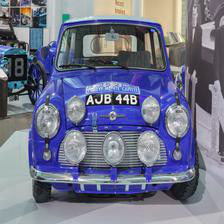

1/1 [==============================] - 1s 645ms/step


0

In [24]:
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

cv2_imshow(validation_data[0][0][0])


x = img_to_array(validation_data[0][0][0])

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

img_class = model2.predict(x).argmax()

img_class

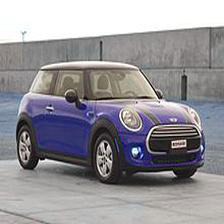

1/1 [==============================] - 1s 671ms/step


0

In [30]:
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

cv2_imshow(validation_data[11][0][0])


x = img_to_array(validation_data[11][0][0])

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

img_class = model2.predict(x).argmax()

img_class

1/1 [==============================] - 1s 607ms/step


1

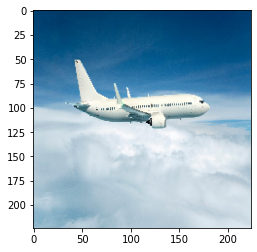

In [34]:
plane = keras.utils.load_img("plane.jpg", target_size = (224, 224))

plt.imshow(plane)

x = img_to_array(plane)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

img_class = model2.predict(x).argmax()

img_class

#Conclusion:
1) Transfer learning enables us to build task specific models in no time by using weights of pretrained models or pretrained model itself without compromising on efficiency.                      
2) We can remove the last layer of the pretrained model and add our custom layer specific for our task and train only on the new layer and freeze the earlier layers. This cuts down the training time by a lot.

In [ ]:
! jupyter nbconvert --to html I082_Shreyas_Dongre_DL_Exp9.ipynb